train neural network without torch.nn, torch.optim, Dataset, DataLoader

In [45]:
from pathlib import Path
import requests

DATA_PATH = Path('data')
PATH = DATA_PATH / 'mnist'

PATH.mkdir(parents=True, exist_ok=True)

URL = 'https://github.com/pytorch/tutorials/raw/main/_static/'
FILENAME = 'mnist.pkl.gz'

if not (PATH / FILENAME).exists():
    content = requests.get(URL+FILENAME).content
    (PATH / FILENAME).open('wb').write(content)


In [46]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

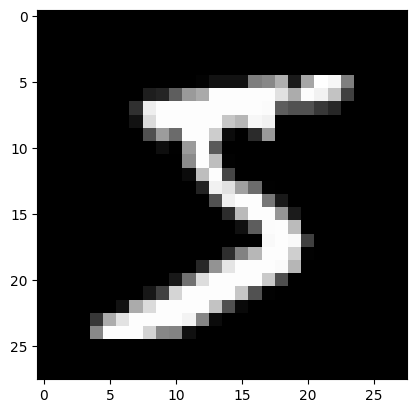

(50000, 784)


In [47]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28,28)), cmap='gray')
pyplot.show()
print(x_train.shape)

In [48]:
import torch

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
num_inputs, num_input_channels = x_train.shape
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


In [49]:
import math

num_output_nodes = 10
weights = torch.randn(num_input_channels, num_output_nodes) / math.sqrt(num_input_channels) # Xavier initialization
weights.requires_grad_()
bias = torch.zeros(num_output_nodes, requires_grad=True)

In [50]:
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    return log_softmax(xb @ weights + bias)

In [51]:
batch_size = 64
xb = x_train[0:batch_size] # batched inputs
preds = model(xb) # predictions
print(preds[0], preds.shape)

tensor([-2.1933, -2.0879, -2.5576, -2.3814, -2.4935, -2.5624, -2.5065, -1.9976,
        -2.3794, -2.0792], grad_fn=<SelectBackward0>) torch.Size([64, 10])


In [52]:
def negative_log_likehood(input, target):
    return -input[range(target.shape[0]), target].mean()

loss_func = negative_log_likehood

In [53]:
yb = y_train[0:batch_size] # batched outputs
print(loss_func(preds, yb))

tensor(2.3534, grad_fn=<NegBackward0>)


In [54]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

In [55]:
print(accuracy(preds, yb))

tensor(0.0781)


In [56]:
# from IPython.core.debugger import set_trace

learning_rate = 0.5
epochs = 2

for epoch in range(epochs):
    print(f'epoch {epoch}')
    for i in range((num_inputs - 1) // batch_size + 1):
        print(f'# {i} batch')
        # set_trace()
        start_i = i * batch_size
        end_i = start_i * batch_size
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * learning_rate
            bias -= bias.grad * learning_rate
            weights.grad.zero_()
            bias.grad.zero_()

epoch 0
# 0 batch
# 1 batch
# 2 batch
# 3 batch
# 4 batch
# 5 batch
# 6 batch
# 7 batch
# 8 batch
# 9 batch
# 10 batch
# 11 batch
# 12 batch
# 13 batch
# 14 batch
# 15 batch
# 16 batch
# 17 batch
# 18 batch
# 19 batch
# 20 batch
# 21 batch
# 22 batch
# 23 batch
# 24 batch
# 25 batch
# 26 batch
# 27 batch
# 28 batch
# 29 batch
# 30 batch
# 31 batch
# 32 batch
# 33 batch
# 34 batch
# 35 batch
# 36 batch
# 37 batch
# 38 batch
# 39 batch
# 40 batch
# 41 batch
# 42 batch
# 43 batch
# 44 batch
# 45 batch
# 46 batch
# 47 batch
# 48 batch
# 49 batch
# 50 batch
# 51 batch
# 52 batch
# 53 batch
# 54 batch
# 55 batch
# 56 batch
# 57 batch
# 58 batch
# 59 batch
# 60 batch
# 61 batch
# 62 batch
# 63 batch
# 64 batch
# 65 batch
# 66 batch
# 67 batch
# 68 batch
# 69 batch
# 70 batch
# 71 batch
# 72 batch
# 73 batch
# 74 batch
# 75 batch
# 76 batch
# 77 batch
# 78 batch
# 79 batch
# 80 batch
# 81 batch
# 82 batch
# 83 batch
# 84 batch
# 85 batch
# 86 batch
# 87 batch
# 88 batch
# 89 batch
# 90 batch
#

In [60]:
xb = x_valid[:64]
yb = y_valid[:64]
logits = model(xb)
print(logits)
print(loss_func(logits, yb), accuracy(logits, yb))

tensor([[-7.6830e+00, -4.5898e+00, -2.0496e+00, -2.2490e-01, -1.0957e+01,
         -4.2387e+00, -8.1297e+00, -1.4554e+01, -3.0522e+00, -1.1609e+01],
        [-1.1333e+01, -8.9762e+00, -5.2603e+00, -5.4443e+00, -5.9740e+00,
         -4.3951e+00, -1.1151e+01, -9.5365e+00, -2.5189e-02, -8.2814e+00],
        [-2.5992e+00, -1.5535e+01, -4.0910e+00, -6.9859e+00, -4.5463e+00,
         -2.6618e+00, -1.9139e-01, -6.6155e+00, -8.0763e+00, -8.9177e+00],
        [-9.8823e+00, -1.1552e+01, -7.2626e+00, -7.2816e+00, -4.1549e+00,
         -9.3022e+00, -1.0659e+01, -1.6085e+00, -8.3475e+00, -2.4549e-01],
        [-9.2077e+00, -1.2836e+01, -4.4705e+00, -1.0153e+01, -1.0788e+01,
         -6.5661e+00, -1.3819e-02, -1.7749e+01, -7.2479e+00, -1.5148e+01],
        [-9.8911e+00, -5.7105e+00, -3.7982e+00, -7.7578e+00, -9.7922e-01,
         -5.8882e+00, -2.8664e+00, -4.4538e+00, -4.4479e+00, -6.6324e-01],
        [-4.8542e+00, -1.3242e+01, -1.8483e+01, -1.1977e+01, -6.0227e+00,
         -5.7440e-02, -1.2135e+0